In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from cbsim import co2
from cbsim.net import Net
from cbsim.request import Request
from cbsim.stochastic import Stochastic
from cbsim.experiment import read_exper_data
from cbsim.experiment import read_sample_data
from cbsim.experiment import sturges
from cbsim.experiment import plot_norm
from cbsim.experiment import chi_square_norm as chi2
from cbsim.experiment import sample_stats

In [3]:
weights = {
    'krakow': 0.2,
    'san-sebastian': 0.1,
    'vitoria-gasteiz': 0.1,
    'dubrovnik': 0.05,
    'mechelen': 0.3
}

<H2>Read and process sample

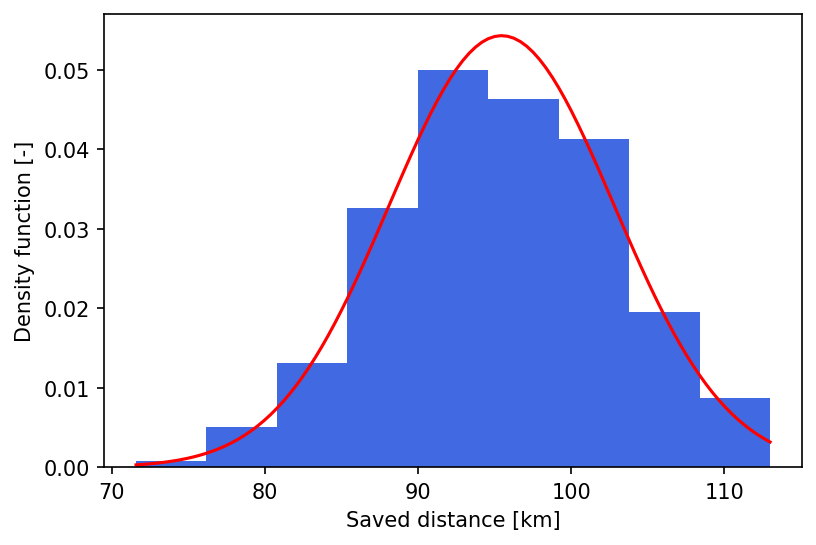

min 71.595
max 112.99
mean 95.464
std 7.347
kv 0.077
var 53.985
u_alpha 1.645
error 4.773
size 6.0


{'chi2': 2.6293, 'test': 329.6489, 'df': 289}

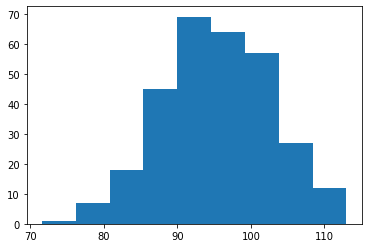

In [4]:
weight = weights['krakow']
ds = np.array(read_sample_data(['sample-krakow.txt'])[weight])
plot_norm(ds, bins=sturges(len(ds)))
sstat = sample_stats(ds, alpha=0.05)
for key in sstat:
    print(key, sstat[key])
chi2(ds, alpha=0.05)

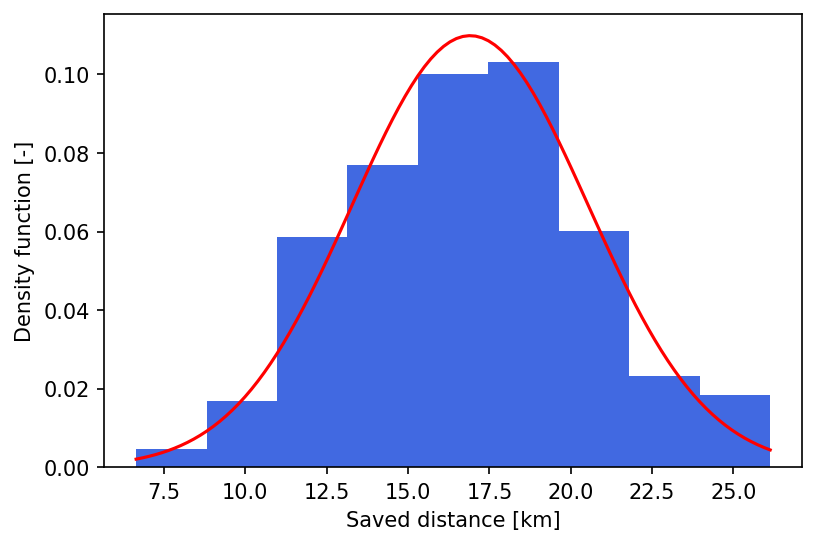

min 6.647
max 26.128
mean 16.908
std 3.63
kv 0.2147
var 13.179
u_alpha 1.645
error 0.845
size 50.0


{'chi2': 9.7404, 'test': 329.6489, 'df': 289}

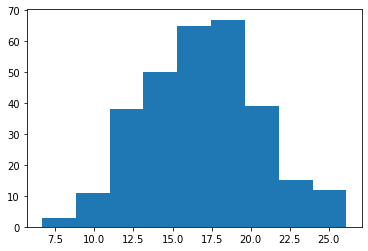

In [8]:
weight = weights['mechelen']
ds = np.array(read_sample_data(['sample-mechelen.txt'])[weight])
plot_norm(ds, bins=sturges(len(ds)))
sstat = sample_stats(ds, alpha=0.05)
for key in sstat:
    print(key, sstat[key])
chi2(ds, alpha=0.05)

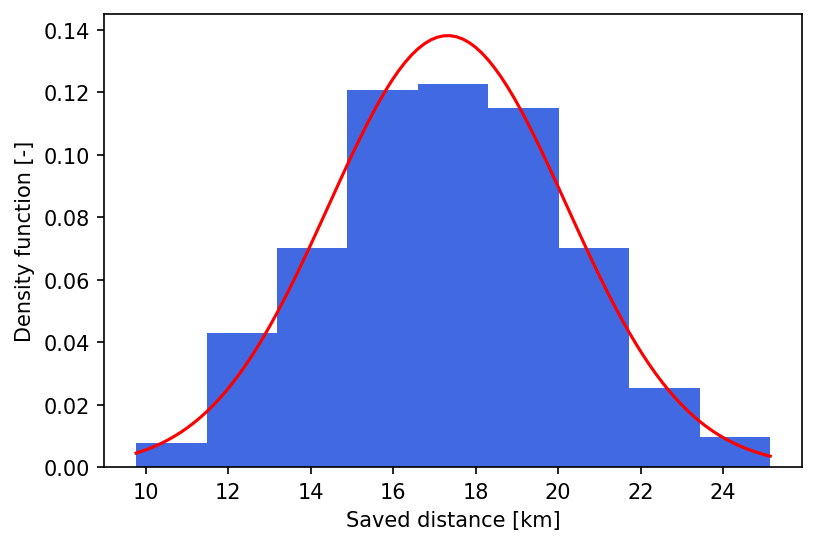

min 9.761
max 25.147
mean 17.321
std 2.886
kv 0.1666
var 8.329
u_alpha 1.645
error 0.866
size 30.0


{'chi2': 3.4527, 'test': 329.6489, 'df': 289}

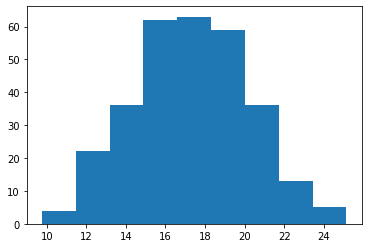

In [13]:
weight = weights['vitoria-gasteiz']
ds = np.array(read_sample_data(['sample-vg.txt'])[weight])
plot_norm(ds, bins=sturges(len(ds)))
sstat = sample_stats(ds, alpha=0.05)
for key in sstat:
    print(key, sstat[key])
chi2(ds, alpha=0.05)

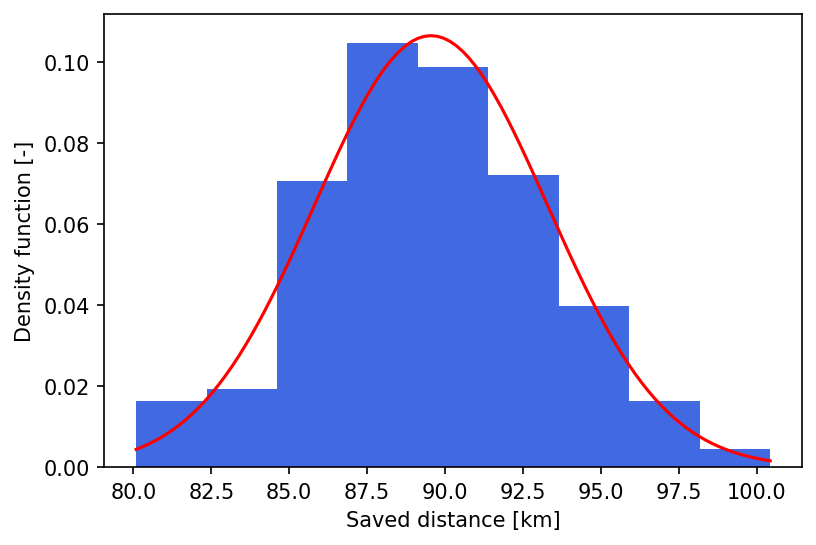

min 80.088
max 100.431
mean 89.547
std 3.742
kv 0.0418
var 14.006
u_alpha 1.645
error 4.477
size 2.0


{'chi2': 7.1115, 'test': 329.6489, 'df': 289}

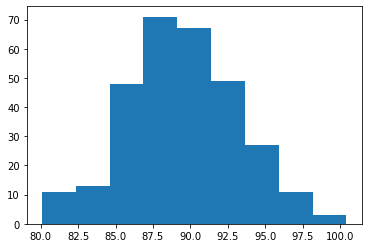

In [28]:
weight = weights['san-sebastian']
ds = np.array(read_sample_data(['sample-ss.txt'])[weight])
plot_norm(ds, bins=sturges(len(ds)))
sstat = sample_stats(ds, alpha=0.05)
for key in sstat:
    print(key, sstat[key])
chi2(ds, alpha=0.05)

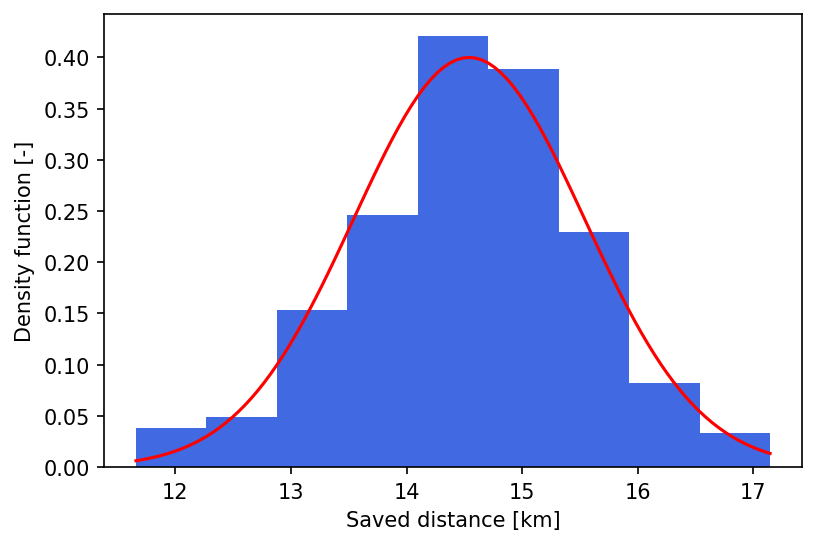

min 11.66
max 17.144
mean 14.541
std 0.997
kv 0.0686
var 0.995
u_alpha 1.645
error 0.727
size 5.0


{'chi2': 9.923, 'test': 329.6489, 'df': 289}

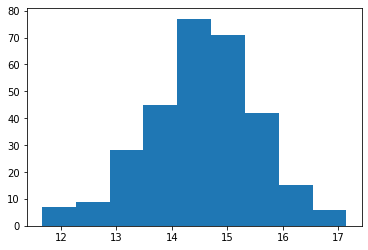

In [24]:
weight = weights['dubrovnik']
ds = np.array(read_sample_data(['sample-dubrovnik.txt'])[weight])
plot_norm(ds, bins=sturges(len(ds)))
sstat = sample_stats(ds, alpha=0.05)
for key in sstat:
    print(key, sstat[key])
chi2(ds, alpha=0.05)

<H1> Kraków

In [29]:
net = Net()
net.load_from_file(fnodes='nodes.txt', flinks='links.txt')
# traffic flow studies from May 2021
days = 5
fdata = {
    0: [[68, 70, 92, 84, 119], [70, 82, 80, 67, 77]],           # Sławkowska
    2: [[52, 38, 35, 40, 54], [45, 38, 48, 40, 40]],            # Szczepańska
    4: [[67, 64, 113, 129, 131], [149, 157, 142, 142, 171]],    # Św. Anny
    5: [[30, 27, 31, 31, 43], [66, 64, 60, 55, 93]],            # Franciszkańska
    6: [[22, 38, 36, 35, 52], [149, 134, 120, 184, 102]],       # Poselska
    10: [[153, 143, 172, 176, 214], [130, 122, 119, 152, 142]], # Sienna
    12: [[43, 45, 49, 57, 60], [57, 48, 57, 59, 69]]            # Szpitalna
}
outlets = [
    0,  # Sławkowska
    1,  # Św. Tomasza
    3,  # Szewska
    5,  # Franciszkańska
    7,  # Kanonicza
    8,  # Grodzka
    9,  # Dominikańska
    10, # Sienna
    11, # Mikołajska
    12  # Szpitalna
]
loadpoints = {15: 'A', 28: 'B', 24: 'C', 19: 'D', 8: 'E', 20: 'F'}
probs = { 'R': 1, 'H': 1, 'S': 1, 'P': 1, 'W': 1 }
# probs = { 'R': 0.2, 'H': 0.05, 'S': 0.2, 'P': 0.15, 'W': 0.05 }

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).mean()) # MEAN

<H1> San Sebastian

In [66]:
net = Net()
net.load_from_file(fnodes='ss-nodes.csv', flinks='ss-links.csv')

days = 6 # 7:00am-11:30am
fdata = {
    0: [[114, 108, 107, 51, 139, 114], [15, 11, 7, 5, 8, 2]],   # Calle San Juan
    1: [[103, 102, 88, 35, 118, 101], [17, 7, 6, 13, 10, 9]],   # Calle Inigo
    10: [[130, 127, 106, 47, 117, 78], [3, 11, 7, 5, 14, 18]],  # Boulevard
    21: [[47, 23, 43, 21, 45, 35], [25, 33, 27, 19, 42, 19]]    # Calle Ijentea
}
loadpoints = {0: 'A', 21: 'B'}
outlets = [3, 6, 19]

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).mean() / 2 )

<h1> Vitoria-Gasteiz

In [9]:
net = Net()
net.load_from_file(fnodes='vg-nodes.csv', flinks='vg-links.csv')

days = 5 # 1 hour (9am - 10am)
fdata = {
    0: [[31, 40, 32, 32, 31], [34, 29, 43, 34, 32]],    # San Antonio / Florida
    1: [[9, 3, 1, 0, 1], [0, 0, 0, 0, 0]],              # Dato
    3: [[29, 24, 19, 18, 30], [1, 0, 1, 0, 1]],         # Virgen Blanca
    4: [[26, 10, 16, 17, 16], [3, 1, 2, 1, 1]],         # Plaza de los Celedones de Oro
    5: [[52, 40, 36, 54, 40], [6, 7, 8, 10, 6]],        # Fueros
    6: [[42, 39, 26, 19, 25], [11, 14, 13, 16, 11]]     # Independencia
}

loadpoints = {0: 'A'}
outlets = [0, 2, 7, 11]

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).mean() * 2)

<h1> Dubrovnik

In [21]:
net = Net()
net.load_from_file(fnodes='dbr-nodes.csv', flinks='dbr-links.csv')

days = 5 # 1 hour (9:00am - 10:00am)
fdata = {
    0:  [[15, 11, 16, 12, 15], [1, 1, 1, 3, 1]] # Gate
}
loadpoints = {0: 'A'}
outlets = [0]

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).mean() * 2)

<h1> Mechelen

In [5]:
net = Net()
net.load_from_file(fnodes='mhln-nodes.csv', flinks='mhln-links.csv')

days = 5 # 2 hours (8:30am - 10:30am)
fdata = {
    0:  [[38, 43, 47, 53, 49], [37, 33, 26, 32, 54]],        # Vijfhoek
    6:  [[68, 72, 84, 68, 65], [131, 140, 110, 119, 124]],   # IJzerenleen
    15: [[113, 91, 87, 97, 97], [465, 490, 474, 476, 476]]   # Sint Kathelijnestraat 
}
loadpoints = {0: 'A', 5: 'B', 16: 'C'}
outlets = [8, 23, 32, 55, 81]

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).mean())

<h1> Prepare simulations

In [69]:
# probs = { 'R': 1, 'H': 1, 'S': 1, 'P': 1, 'W': 1 }
probs = { 'R': 0.2, 'H': 0.05, 'S': 0.2, 'P': 0.15, 'W': 0.05 }
itscs = [nd for nd in net.nodes if nd.type == 'N']

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).max()) # MEAN
_total = sum(flows.values()) # total number of requests to generate
print(_total)

clients = [nd for nd in net.nodes if nd.type != 'N' and nd.type != 'L']
entries = sorted(flows.keys())
zones = sorted([r.code for r in net.regions])

def simulate(weight=0.15, capacity=0.15):
    # 1) generate requests
    generated = 0
    reqs = []
    while generated < _total:
        dst = np.random.choice(clients)
        if np.random.random() < probs[dst.type]:
            req = Request(0, None, dst)
            generated += 1
            reqs.append(req)
    # 2) generate demand using the proposed aproach
    reqs = net.gen_demand(flows=flows,
                        probs=probs,
                        requests=reqs,
                        s_weight=Stochastic(law=1, location=weight, scale=0.3*weight),
                        traditional=False)
    # 3) calculate distances savings
    dds = net.simulate(requests=reqs, outlets=outlets, loadpoints=None, capacity=capacity)
    bds = net.simulate(requests=reqs, outlets=outlets, loadpoints=loadpoints.keys(), capacity=capacity)
    # print(len(dds[0]), len(dds[1]), sum(dds[0]), sum(dds[1]))
    # print(len(bds[0]), len(bds[1]), sum(bds[0]), sum(bds[1]), sum(bds[0]) + sum(bds[1]))
    #print(sum(dds[0]) - sum(bds[0]) - sum(bds[1]))
    return dds[0], bds[0], bds[1]

500


<H2>Sample simulation

In [27]:
capacity = 0.15
sample = 300
weight = weights['san-sebastian']

simfile = open('sample-ss.txt', 'w')
for _ in range(sample):
    res = simulate(weight, capacity)
    simfile.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(weight,
        len(res[0]), sum(res[0]),
        len(res[1]), sum(res[1]),
        len(res[2]), sum(res[2])))
    print(capacity, weight, sum(res[0]) - sum(res[1]) - sum(res[2]))
simfile.close()

0.15 0.1 92.00799999999994
0.15 0.1 88.515
0.15 0.1 85.11299999999994
0.15 0.1 86.33699999999965
0.15 0.1 89.20299999999983
0.15 0.1 80.08800000000002
0.15 0.1 85.76700000000002
0.15 0.1 83.19300000000001
0.15 0.1 93.45899999999986
0.15 0.1 91.254
0.15 0.1 95.24
0.15 0.1 96.94099999999992
0.15 0.1 93.23100000000002
0.15 0.1 91.4139999999999
0.15 0.1 88.37299999999978
0.15 0.1 86.78699999999981
0.15 0.1 94.36799999999991
0.15 0.1 88.1099999999998
0.15 0.1 88.83899999999983
0.15 0.1 89.71799999999989
0.15 0.1 92.56199999999986
0.15 0.1 88.27199999999988
0.15 0.1 90.67199999999994
0.15 0.1 87.839
0.15 0.1 95.18199999999985
0.15 0.1 85.52199999999975
0.15 0.1 91.04699999999987
0.15 0.1 86.8249999999998
0.15 0.1 88.91399999999999
0.15 0.1 85.02299999999998
0.15 0.1 90.11
0.15 0.1 83.96299999999978
0.15 0.1 93.46600000000005
0.15 0.1 91.90099999999983
0.15 0.1 86.72099999999982
0.15 0.1 95.91499999999982
0.15 0.1 91.71399999999997
0.15 0.1 88.3439999999999
0.15 0.1 86.956
0.15 0.1 97.2309999

<H1>Run simulations

In [70]:
capacities = [0.1, 0.15, 0.2, 0.25, 0.3]
capacity = 0.15
sample = 10
ws = [round(0.01 + i * 0.01, 2) for i in range(20)] + \
     [round(0.2 + i * 0.05, 2) for i in range(17)]

# for capacity in capacities:
# simfile = open('weight-experiment-ss-c={}.txt'.format(capacity), 'w')
simfile = open('weight-experiment-san-sebastian-max.txt', 'w')
for w in ws:
    for _ in range(sample):
        res = simulate(w, capacity)
        simfile.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(w,
            len(res[0]), sum(res[0]),
            len(res[1]), sum(res[1]),
            len(res[2]), sum(res[2])))
        print(capacity, w, sum(res[0]) - sum(res[1]) - sum(res[2]))
simfile.close()

0.15 0.01 121.14499999999931
0.15 0.01 118.15999999999941
0.15 0.01 117.97299999999932
0.15 0.01 116.3969999999995
0.15 0.01 123.60699999999925
0.15 0.01 125.6389999999994
0.15 0.01 123.58999999999936
0.15 0.01 125.02899999999933
0.15 0.01 133.34499999999946
0.15 0.01 123.40799999999926
0.15 0.02 122.15099999999931
0.15 0.02 121.86299999999942
0.15 0.02 119.22099999999925
0.15 0.02 129.19699999999938
0.15 0.02 120.87799999999937
0.15 0.02 119.91299999999943
0.15 0.02 122.91299999999943
0.15 0.02 129.46199999999948
0.15 0.02 118.30199999999967
0.15 0.02 123.4879999999993
0.15 0.03 123.07899999999934
0.15 0.03 124.18299999999941
0.15 0.03 124.99999999999945
0.15 0.03 120.52999999999942
0.15 0.03 120.60199999999939
0.15 0.03 123.53099999999957
0.15 0.03 128.4459999999994
0.15 0.03 118.21799999999958
0.15 0.03 113.79799999999959
0.15 0.03 118.12799999999952
0.15 0.04 122.96799999999969
0.15 0.04 122.81399999999958
0.15 0.04 112.53699999999942
0.15 0.04 122.25699999999951
0.15 0.04 124.7379

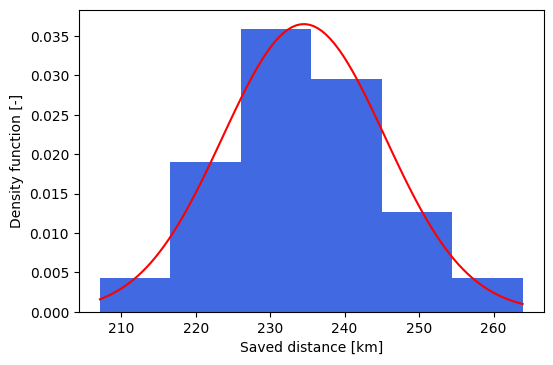

(2.348395374127417, 234.5304, 10.925152300997919)

In [7]:
sims = []
simfile = open('sim-mean-0.15-50.txt', 'r')
for line in simfile.readlines():
    sims.append(round(float(line), 3))
simfile.close()
plot_norm(sims, 6)

<H1>Read simulations data

In [4]:
# Krakow data

wsmin = read_exper_data(['weight-experiment-min.txt',
                         'weight-experiment-min-small.txt',
                         'weight-experiment-min-big.txt'])
wsmid = read_exper_data(['weight-experiment.txt',
                         'weight-experiment-small.txt',
                         'weight-experiment-small-2.txt',
                         'weight-experiment-big.txt',
                         'weight-experiment-0.65.txt',
                         'weight-experiment-0.70.txt'])
wsmax = read_exper_data(['weight-experiment-max-small.txt',
                         'weight-experiment-max.txt',
                         'weight-experiment-max-big.txt'])

wsmin1 = read_exper_data(['weight-experiment-min-p=1.0.txt',
                          'weight-experiment-min-p=1.0-small.txt',
                          'weight-experiment-min-p=1.0-big.txt'])
wsmid1 = read_exper_data(['weight-experiment-p=1.0.txt',
                          'weight-experiment-p=1.0-small.txt',
                          'weight-experiment-p=1.0-big.txt',
                          'weight-experiment-0.65-p=1.0.txt',
                          'weight-experiment-0.70-p=1.0.txt'])
wsmax1 = read_exper_data(['weight-experiment-max-p=1.0.txt',
                          'weight-experiment-max-p=1.0-small.txt',
                          'weight-experiment-max-p=1.0-big.txt'])

vsmin = read_exper_data(['weight-experiment-min.txt',
                         'weight-experiment-min-small.txt'],
                         False)
vsmid = read_exper_data(['weight-experiment.txt',
                         'weight-experiment-small.txt',
                         'weight-experiment-small-2.txt'],
                         False)
vsmax = read_exper_data(['weight-experiment-max-small.txt',
                         'weight-experiment-max.txt'],
                         False)

ws = [w for w in wsmid.keys() if w <= 0.5]

In [7]:
# San Sebastian data

wsmin = read_exper_data(['weight-experiment-san-sebastian-min.txt'])
wsmid = read_exper_data(['weight-experiment-san-sebastian.txt'])
wsmax = read_exper_data(['weight-experiment-san-sebastian-max.txt'])

wsmin1 = read_exper_data(['weight-experiment-san-sebastian-min-p=1.0.txt'])
wsmid1 = read_exper_data(['weight-experiment-san-sebastian-p=1.0.txt'])
wsmax1 = read_exper_data(['weight-experiment-san-sebastian-max-p=1.0.txt'])

vsmin = read_exper_data(['weight-experiment-san-sebastian-min-p=1.0.txt'], False)
vsmid = read_exper_data(['weight-experiment-san-sebastian-p=1.0.txt'], False)
vsmax = read_exper_data(['weight-experiment-san-sebastian-max-p=1.0.txt'], False)

ws = [w for w in wsmid.keys() if w <= 0.5]

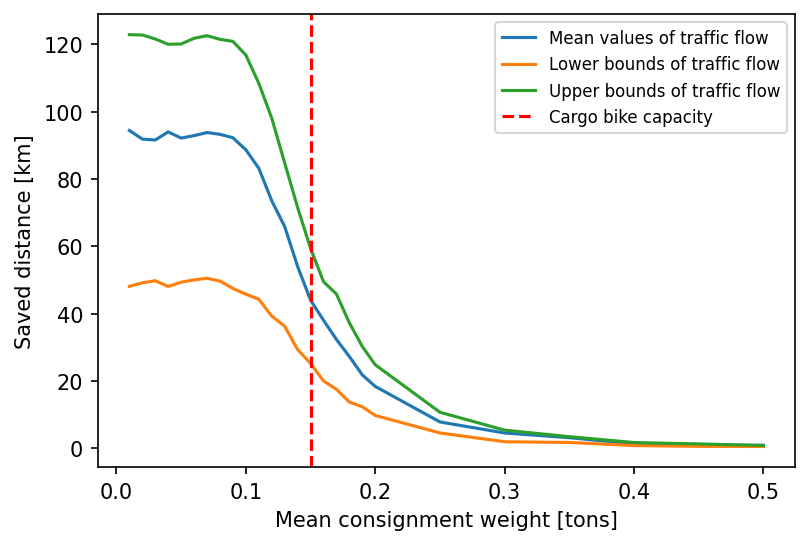

In [8]:
plt.figure(dpi=150)
plt.plot(ws, [wsmid[w] for w in ws], label='Mean values of traffic flow')
plt.plot(ws, [wsmin[w] for w in ws], label='Lower bounds of traffic flow')
plt.plot(ws, [wsmax[w] for w in ws], label='Upper bounds of traffic flow')
plt.axvline(0.15, linestyle='--', color='red', label='Cargo bike capacity')
plt.xlabel('Mean consignment weight [tons]')
plt.ylabel('Saved distance [km]')
plt.legend(fontsize=8)
plt.show()

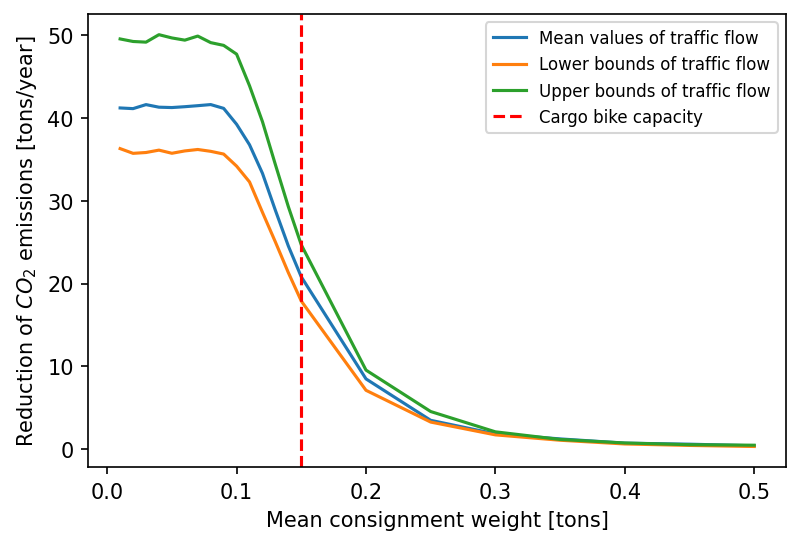

In [6]:
# vs = {'min': 1028, 'mid': 1186, 'max': 1435} # vehicles for Krakow
vs = {'min': 196, 'mid': 387, 'max': 500} # vehicles for San Sebastian
vehs = {
    'san-sebastian': 387,
    'vitoria-gasteiz': 205,
    'dubrovnik': 15,
    'mechelen': 851,
}

plt.figure(dpi=150)
plt.plot(ws,
         [0.365 * co2.calc_co2(vs['mid'], wsmid[w], co2.cons, co2.em_fs) for w in ws],
         label='Mean values of traffic flow')
plt.plot(ws, 
         [0.365 * co2.calc_co2(vs['min'], wsmin[w], co2.cons, co2.em_fs) for w in ws],
         label='Lower bounds of traffic flow')
plt.plot(ws,
         [0.365 * co2.calc_co2(vs['max'], wsmax[w], co2.cons, co2.em_fs) for w in ws],
         label='Upper bounds of traffic flow')
plt.axvline(0.15, linestyle='--', color='red', label='Cargo bike capacity')
plt.xlabel('Mean consignment weight [tons]')
plt.ylabel(r'Reduction of $CO_2$ emissions [tons/year]')
plt.legend(fontsize=8)
plt.show()

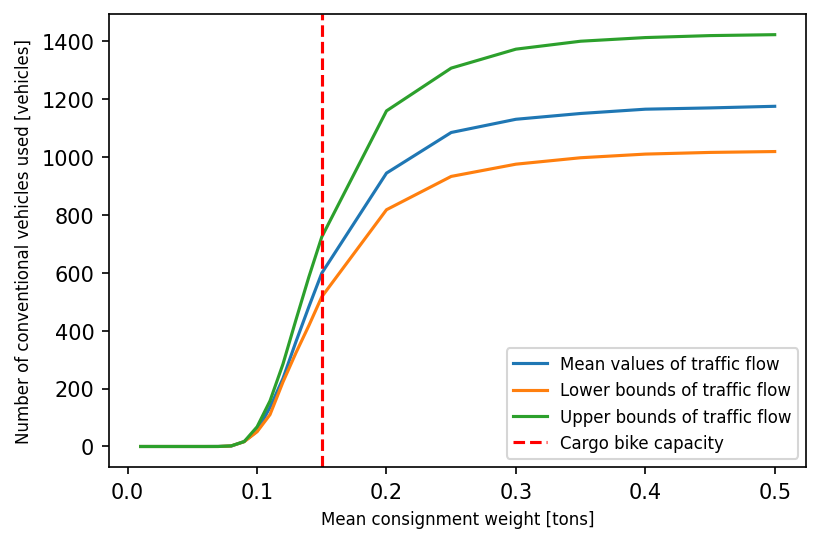

In [19]:
plt.figure(dpi=150)
plt.plot(ws, [vsmid[w] for w in ws], label='Mean values of traffic flow')
plt.plot(ws, [vsmin[w] for w in ws], label='Lower bounds of traffic flow')
plt.plot(ws, [vsmax[w] for w in ws], label='Upper bounds of traffic flow')
plt.axvline(0.15, linestyle='--', color='red', label='Cargo bike capacity')
plt.xlabel('Mean consignment weight [tons]', fontsize=8)
plt.ylabel('Number of conventional vehicles used [vehicles]', fontsize=8)
plt.legend(fontsize=8)
plt.show()

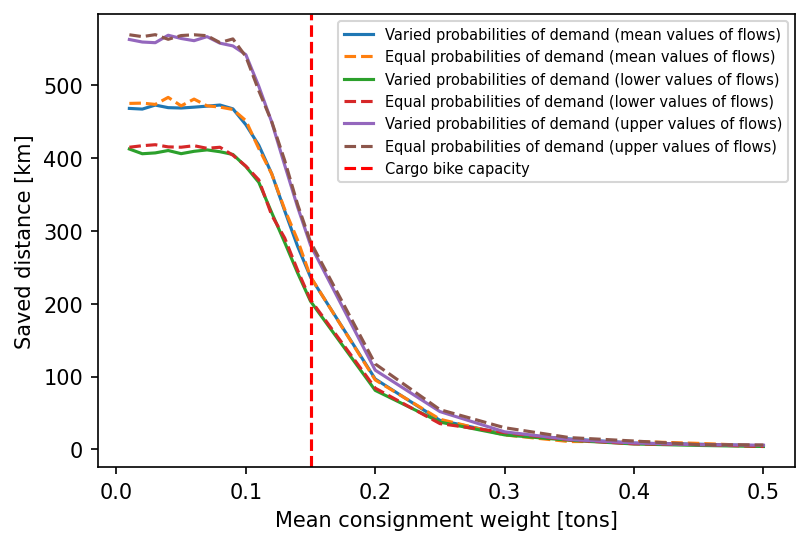

In [20]:
ws = [w for w in wsmin1.keys() if w <= 0.5]

plt.figure(dpi=150)

plt.plot(ws, [wsmid[w] for w in ws], label='Varied probabilities of demand (mean values of flows)')
plt.plot(ws, [wsmid1[w] for w in ws], label='Equal probabilities of demand (mean values of flows)', linestyle='--')

plt.plot(ws, [wsmin[w] for w in ws], label='Varied probabilities of demand (lower values of flows)')
plt.plot(ws, [wsmin1[w] for w in ws], label='Equal probabilities of demand (lower values of flows)', linestyle='--')

plt.plot(ws, [wsmax[w] for w in ws], label='Varied probabilities of demand (upper values of flows)')
plt.plot(ws, [wsmax1[w] for w in ws], label='Equal probabilities of demand (upper values of flows)', linestyle='--')

plt.axvline(0.15, linestyle='--', color='red', label='Cargo bike capacity')

plt.xlabel('Mean consignment weight [tons]')
plt.ylabel('Saved distance [km]')
plt.legend(fontsize=7)
plt.show()

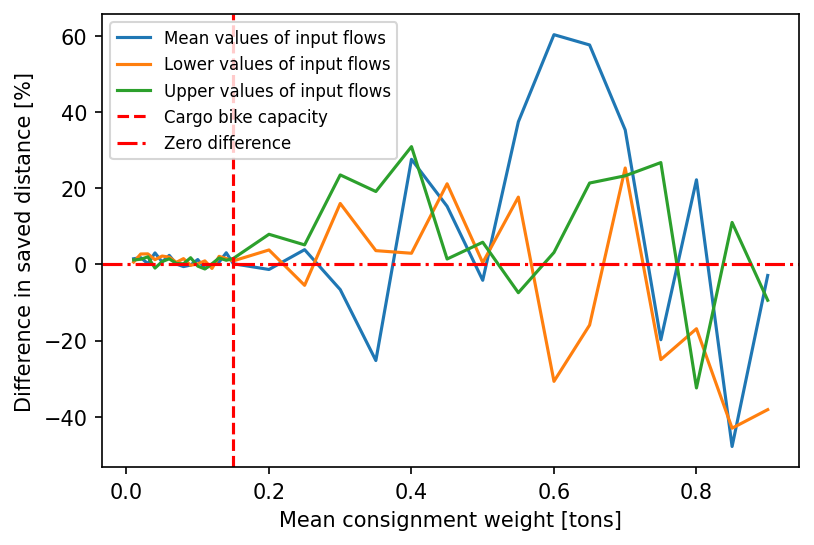

In [21]:
ws = [w for w in wsmin1.keys() if w <= 0.9]

plt.figure(dpi=150)

plt.plot(ws, 
         [100 * (wsmid1[w] - wsmid[w]) / wsmid[w] for w in ws],
         label='Mean values of input flows')
plt.plot(ws, 
         [100 * (wsmin1[w] - wsmin[w]) / wsmin[w] for w in ws],
         label='Lower values of input flows')
plt.plot(ws, 
         [100 * (wsmax1[w] - wsmax[w]) / wsmax[w] for w in ws],
         label='Upper values of input flows')

plt.axvline(0.15, linestyle='--', color='red', label='Cargo bike capacity')
plt.axhline(0, linestyle='-.', color='red', label='Zero difference')

plt.xlabel('Mean consignment weight [tons]')
plt.ylabel('Difference in saved distance [%]')
plt.legend(fontsize=8)
plt.show()

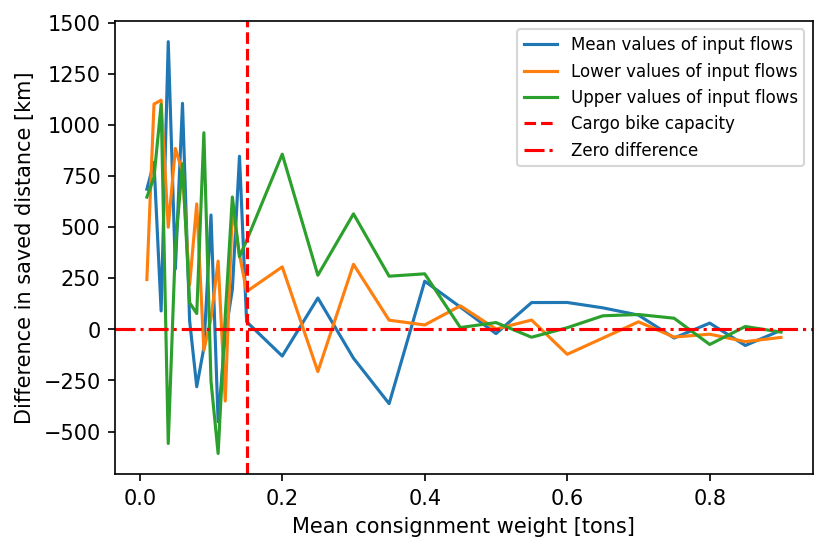

In [22]:
plt.figure(dpi=150)

plt.plot(ws, 
         [100 * (wsmid1[w] - wsmid[w]) for w in ws],
         label='Mean values of input flows')
plt.plot(ws, 
         [100 * (wsmin1[w] - wsmin[w]) for w in ws],
         label='Lower values of input flows')
plt.plot(ws, 
         [100 * (wsmax1[w] - wsmax[w]) for w in ws],
         label='Upper values of input flows')

plt.axvline(0.15, linestyle='--', color='red', label='Cargo bike capacity')
plt.axhline(0, linestyle='-.', color='red', label='Zero difference')

plt.xlabel('Mean consignment weight [tons]')
plt.ylabel('Difference in saved distance [km]')
plt.legend(fontsize=8)
plt.show()

In [9]:
capacities = [0.1, 0.15, 0.2, 0.25, 0.3]
wcs = {}
for c in capacities:
    # wcs[c] = read_exper_data(['weight-experiment-c={}.txt'.format(c)])
    wcs[c] = read_exper_data(['weight-experiment-ss-c={}.txt'.format(c)])

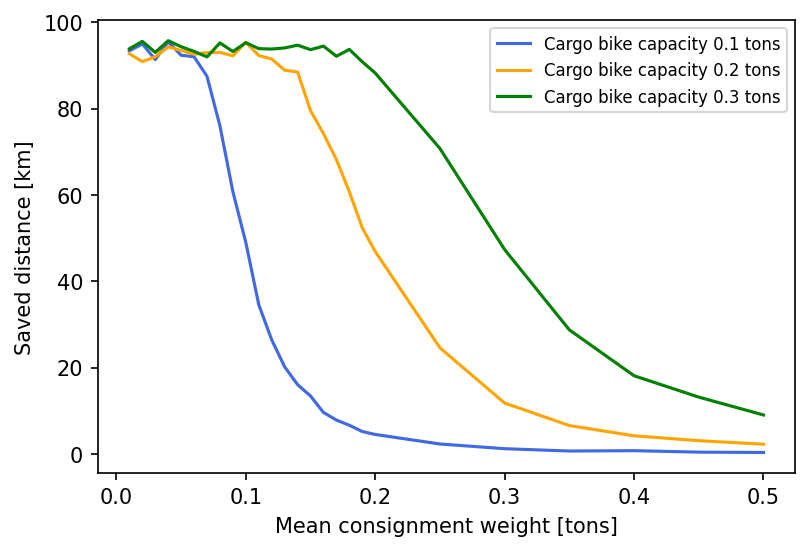

In [10]:
ws = [round(0.01 + i * 0.01, 2) for i in range(20)] + \
     [round(0.2 + i * 0.05, 2) for i in range(7)]

colors = ['royalblue', 'orange', 'green', 'red', 'purple']

plt.figure(dpi=150)
i = 0
for c in [0.1, 0.2, 0.3]: #capacities:
    plt.plot(ws, [wcs[c][w] for w in ws], label='Cargo bike capacity {} tons'.format(c), color=colors[i])
    # plt.axvline(c, linestyle='--', color=colors[i])
    i += 1

# plt.plot(capacities, [wcs[c][c] for c in capacities], linestyle='-.')
# plt.axhline(0.5 * (min(wcs[c].values()) + max(wcs[c].values())), linestyle='-.')

plt.xlabel('Mean consignment weight [tons]')
plt.ylabel('Saved distance [km]')
plt.legend(fontsize=8)
plt.show()

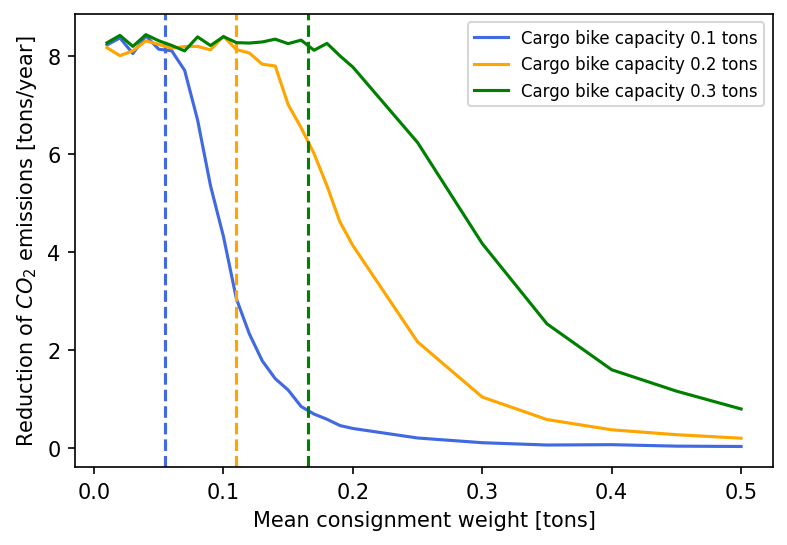

In [11]:
plt.figure(dpi=150)
i = 0
for c in [0.1, 0.2, 0.3]: #capacities:
    plt.plot(ws,
            #  [wcs[c][w] for w in ws],
             [0.365 * co2.calc_co2(vs['mid'], wcs[c][w], co2.cons, co2.em_fs) for w in ws],
             label='Cargo bike capacity {} tons'.format(c), color=colors[i])
    plt.axvline( c * 0.55, linestyle='--', color=colors[i])
    i += 1

# plt.plot(capacities, [wcs[c][c] for c in capacities], linestyle='-.')
# plt.axhline(0.5 * (min(wcs[c].values()) + max(wcs[c].values())), linestyle='-.')

plt.xlabel('Mean consignment weight [tons]')
plt.ylabel(r'Reduction of $CO_2$ emissions [tons/year]')
plt.legend(fontsize=8)
plt.show()

<h1> CCCB results

In [21]:
ws = [round(0.01 + i * 0.01, 2) for i in range(20)] + \
     [round(0.2 + i * 0.05, 2) for i in range(7)]
wcs = {}
wcs['san-sebastian'] = read_exper_data(['weight-experiment-san-sebastian.txt'])
wcs['vitoria-gasteiz'] = read_exper_data(['weight-experiment-vitoria-gasteiz.txt'])
wcs['dubrovnik'] = read_exper_data(['weight-experiment-dubrovnik.txt'])
wcs['mechelen'] = read_exper_data(['weight-experiment-mechelen.txt'])
cities = list(wcs.keys())
smallws = [w for w in ws if w <= 0.5]

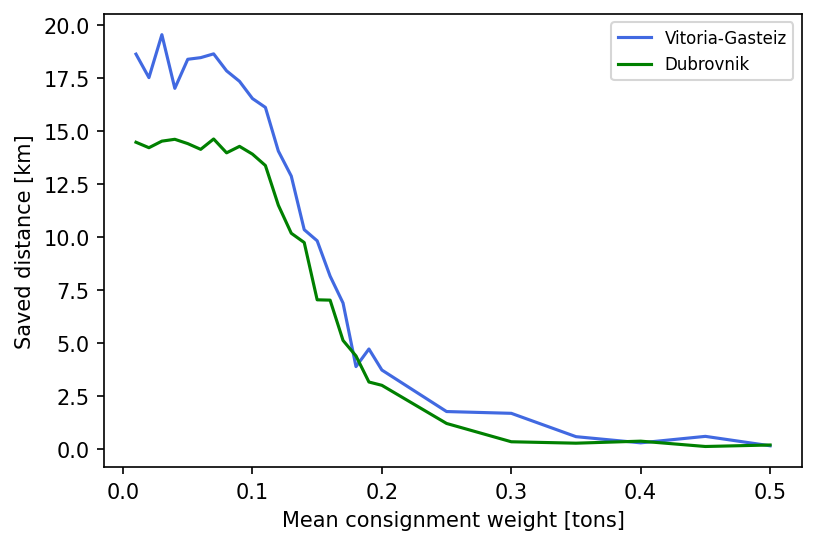

In [22]:
plt.figure(dpi=150)
plt.plot(smallws, [wcs['vitoria-gasteiz'][w] for w in smallws], label='Vitoria-Gasteiz', color='royalblue')
plt.plot(smallws, [wcs['dubrovnik'][w] for w in smallws], label='Dubrovnik', color='green')
plt.xlabel('Mean consignment weight [tons]')
plt.ylabel('Saved distance [km]')
plt.legend(fontsize=8)
plt.show()

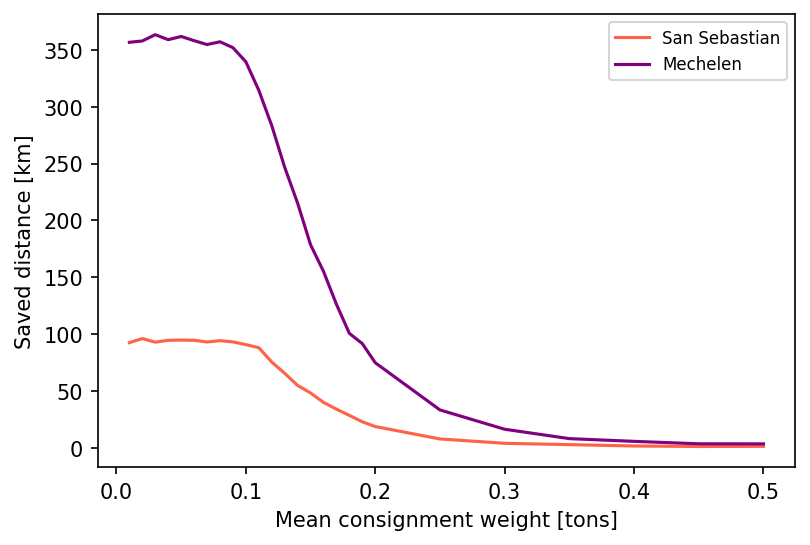

In [23]:
plt.figure(dpi=150)
plt.plot(smallws, [wcs['san-sebastian'][w] for w in smallws], label='San Sebastian', color='tomato')
plt.plot(smallws, [wcs['mechelen'][w] for w in smallws], label='Mechelen', color='purple')
plt.xlabel('Mean consignment weight [tons]')
plt.ylabel('Saved distance [km]')
plt.legend(fontsize=8)
plt.show()